In [418]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score , cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier





In [419]:
df = pd.read_csv('HR_comma_sep.csv')

In [420]:
# Perform data quality checks by checking for missing values, if any. df.head()

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [421]:
numeric = df.select_dtypes(include='number')
numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0



### 2- Understand what factors contributed most to employee turnover at EDA. 

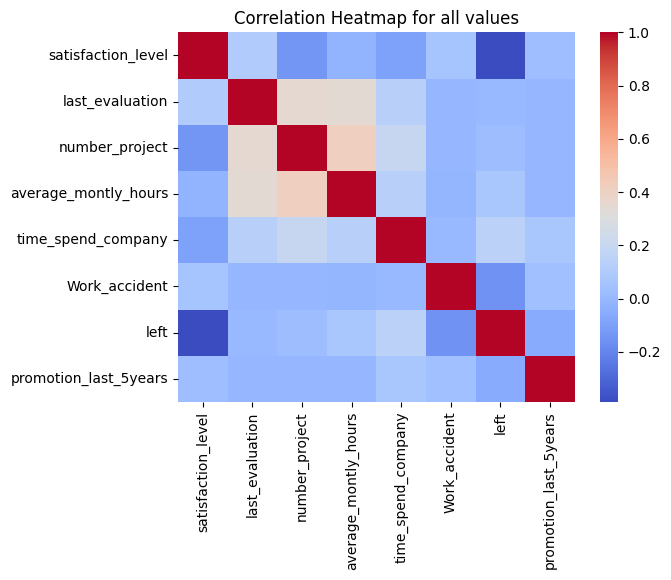

In [422]:
# - Draw a heatmap of the correlation matrix between all numerical features or columns in the data. 
corr = numeric.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f' )
plt.title("Correlation Heatmap for all values")
plt.show()

In [423]:
# low satisfaction  vs left --> string negative correlation, satisfaction decreases and plrobablity of leaving increase
co = pd.DataFrame(corr)
co

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### Draw the distribution plot of:

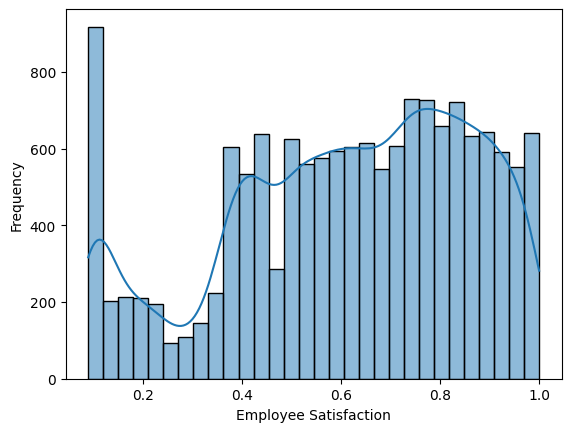

In [424]:
# - Employee Satisfaction (use column satisfaction_level) 
sns.histplot(df['satisfaction_level'], bins=30, kde=True)
plt.xlabel('Employee Satisfaction')
plt.ylabel('Frequency')
plt.show()

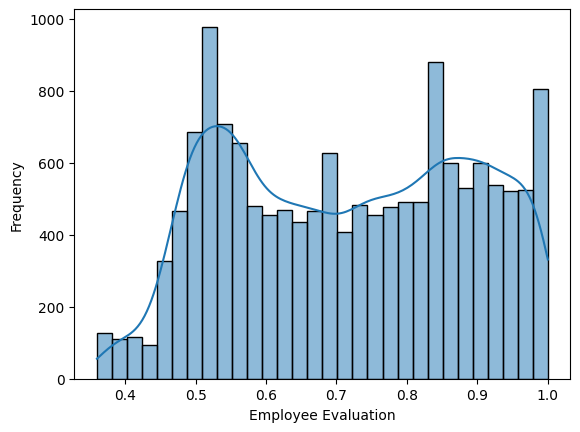

In [425]:
#    - Employee Evaluation (use column last_evaluation) 

sns.histplot(df['last_evaluation'],bins=30, kde=True)
plt.xlabel('Employee Evaluation')
plt.ylabel('Frequency')
plt.show()

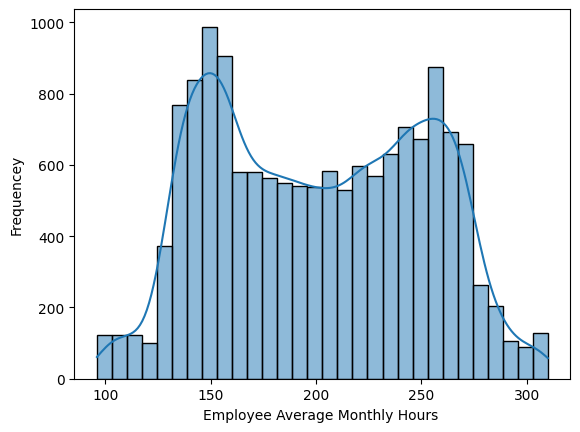

In [426]:
#    - Employee Average Monthly Hours (use column average_monthly_hours)
sns.histplot(df['average_montly_hours'], bins=30, kde=True)
plt.xlabel('Employee Average Monthly Hours ')
plt.ylabel('Frequencey')
plt.show()

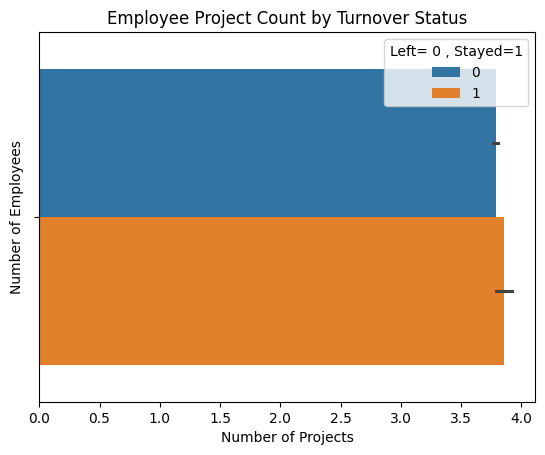

In [427]:
#   - Draw the bar plot of the employee project count of both employees who left and stayed in the organization
#      (use column number_project and hue column left), and give your inferences from the plot

sns.barplot(
    data=df,
    x='number_project',
    hue='left'
)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Employee Project Count by Turnover Status')
plt.legend(loc='best',title='Left= 0 , Stayed=1')
plt.show()

### 3- Perform clustering of employees who left based on their satisfaction and evaluation. 

In [428]:
# Do K-means clustering of employees who left the company into the appropriate number of clusters.

left_employe = df[df['left'] == 1]
left_employe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [429]:
# - Choose columns satisfaction_level, last_evaluation, and left. 

#  Using only the clustering features (NOT 'left') and it shows only the employess who left
#  but left is not in data anymore in that way so i can use it to cluster it
columns_cluster = left_employe[['satisfaction_level', 'last_evaluation']]
columns_cluster.head(3)

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88


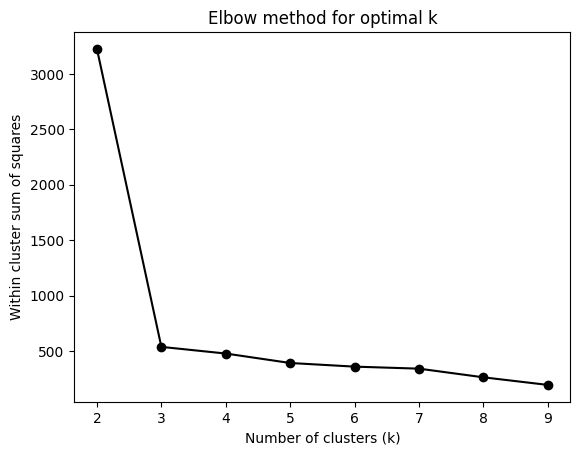

[3226.8951175181314, 536.2887782994452, 476.1142301562168, 390.72422194221866, 357.8683353642331, 339.5987652122533, 261.38385723713094, 192.73198585121713]


In [430]:
# lets do elbow method to pick best cluster

X_scaled = StandardScaler().fit_transform(columns_cluster)

k_range= range(2,10)
intertias =[]

for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=315) 
    kmeans.fit(X_scaled )
    intertias.append(kmeans.inertia_)

plt.plot(k_range, intertias, marker="o", color='black')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within cluster sum of squares')
plt.show()
print(intertias)


In [431]:
# - Fit a `KMeans` model with the chosen k value using `random_state=315`
# - Add the cluster labels as a new column to the original dataframe
# - Create a visualization to show the distribution of data points across clusters

kmeans_2 = KMeans(n_clusters=3, random_state=315)
labels = kmeans_2.fit_predict(X_scaled)
print(len(labels))


left_employe['cluster'] = labels

left_employe.head()

3571


/var/folders/jf/8gpbpnm56tvbxy24tplw57g80000gn/T/ipykernel_26952/301726827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employe['cluster'] = labels


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [432]:
print("Clusters", left_employe['cluster'].value_counts().sort_index)

Clusters <bound method Series.sort_index of cluster
1    1667
0     965
2     939
Name: count, dtype: int64>


In [433]:
#  - Based on the satisfaction and evaluation factors, 
#  give your thoughts on the employee clusters. 
cluster_summary = (
    left_employe
    .groupby('cluster')[['satisfaction_level', 'last_evaluation']]
    .mean()
)

cluster_summary


,satisfaction_level,last_evaluation
cluster,,
0,0.808031,0.916415
1,0.412304,0.517265
2,0.111321,0.870884


In [434]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### 4- Handle the left Class Imbalance using the SMOTE technique. 

In [435]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [436]:

X = df.drop(columns='left')
y = df['left']



In [437]:
# splitig data before doing feature enginering to avoid data leake

X_train, X_test , y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123,
    stratify=y     # ensures that both training and test sets have the same proportion of the target classes, which is essential for imbalanced datasets.
)



In [438]:
# Pre-process the data by converting categorical columns to numerical columns by: 
categorical_col = X_train.select_dtypes(include=['object']).columns
# categorical_col_X_test  = X_test.select_dtypes(include=['object']).columns


In [439]:
# - Applying get_dummies() to the categorical variables 
X_train_cat = pd.get_dummies(X_train[categorical_col], drop_first=True,  dtype=int)
X_train_cat.head(3)

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
6197,0,0,0,0,0,0,1,0,0,1,0
1955,0,0,0,0,0,0,0,1,0,1,0
9440,0,0,0,0,0,0,0,1,0,1,0


In [440]:
X_test_cat = pd.get_dummies(X_test[categorical_col], drop_first=True,  dtype=int)
pd.DataFrame(X_test_cat).isna().sum()


sales_RandD          0
sales_accounting     0
sales_hr             0
sales_management     0
sales_marketing      0
sales_product_mng    0
sales_sales          0
sales_support        0
sales_technical      0
salary_low           0
salary_medium        0
dtype: int64

In [441]:
# scale the numeric colums ------------

# 1) Select numeric columns (from TRAIN only for schema)
num_cols = X_train.select_dtypes(include='number').columns

scaler = StandardScaler()

# 3. Transform TRAIN and TEST numeric data
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])

X_test_num_scaled  = scaler.transform(X_test[num_cols])

X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_scaled  = pd.DataFrame(X_test_num_scaled,  columns=num_cols, index=X_test.index)

X_train_num_scaled.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
6197,-1.862862,-1.900843,0.97280,0.563659,0.344888,-0.411003,-0.148237
1955,-2.104377,0.555873,1.78594,1.124295,0.344888,-0.411003,-0.148237
9440,-0.172258,-1.315910,-1.46662,0.723841,-1.027914,-0.411003,-0.148237


In [442]:

# align put the dataset in order so in the feature it wont get  any conflict
# TRAIN defines the schema , TEST adapts to that schema
X_train_cat, X_test_cat = X_train_cat.align( 
    X_test_cat,
    join='left', # join='left' means: Use the TRAIN set as the reference.
    axis=1,
    fill_value=0
)

pd.DataFrame(X_test_cat).isna().sum()


sales_RandD          0
sales_accounting     0
sales_hr             0
sales_management     0
sales_marketing      0
sales_product_mng    0
sales_sales          0
sales_support        0
sales_technical      0
salary_low           0
salary_medium        0
dtype: int64

In [443]:
# - Combining categorical variables and numeric variables 

# Combining numeric + encoded categorical to train data


X_train_concat = pd.concat(
    [X_train_num_scaled, X_train_cat],
    axis=1
)

X_test_concat = pd.concat(
    [X_test_num_scaled, X_test_cat],
    axis=1
)
pd.DataFrame(X_test_concat).isna().sum()




satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
salary_low               0
salary_medium            0
dtype: int64

In [467]:
print(X_train_num_scaled.shape)
print(X_train_cat.shape)
print(X_train_concat.shape)


(11999, 7)
(11999, 11)
(11999, 18)


In [444]:
# What is SMOTE? (in one sentence)

# SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic samples of the minority
#  class to balance an imbalanced dataset without duplicating existing data and 
#  SMOTE is supervised Model.
# It is applied only to the training data and requires numeric feature representations.

# -------   Why you need SMOTE (your case) -------------------

# Your target left is imbalanced:
# Many employees stayed (0)
# Fewer employees left (1)
# Without fixing this:
# Models learn mostly from left = 0
# Predictions for left = 1 are poor
# SMOTE fixes this for training only.

# ------------ What kind of data SMOTE needs. ------------
#   Numeric features only
#   Target labels available
#   Imbalanced classification problem
#   Logistic Regression, SVM, KNN, Neural Nets

# ------------- How SMOTE works (simple intuition) --------------------

# Instead of copying minority samples
# Finds nearest neighbors of a minority sample
# Creates new synthetic points between them
# Exam : Think of it as interpolating new employees who left, based on real ones.


# ----------  SMOTE is conceptually similar to " K-NN " -----------------

# Uses nearest neighbors
# Distance-based
# Works in feature space
# But:

# It is NOT a classifier
# It does NOT predict
# It only creates data



y_train.value_counts()


left
0    9142
1    2857
Name: count, dtype: int64

In [445]:
# - Up-sample the train dataset using the SMOTE Synthetic Minority Over-sampling Technique)
#  technique from the imbalanced learn module.

sm = SMOTE(random_state=42, k_neighbors=5)

X_res, y_res = sm.fit_resample(X_train_concat, y_train)

y_res.value_counts()



left
0    9142
1    9142
Name: count, dtype: int64

## 5- Perform 5-fold cross-validation model training and evaluate performance. 

### 5.1Train a logistic regression model, apply a 5-fold CV, and plot the classification report

In [446]:
# Train a logistic regression model, apply a 5-fold CV, and plot the classification report

logistic_model = LogisticRegression(max_iter=1000, random_state=315)
# fit_result = logistic_model.fit(training_df[features], training_df[label])


# Evaluate on original dataset
scores_original = cross_validate(
    logistic_model,
    X_res,
    y_res,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'
    }
)
{m: scores_original[f'test_{m}'].mean() for m in ['accuracy','precision','recall','roc_auc']}



{'accuracy': np.float64(0.7656424326955469),
 'precision': np.float64(0.7555527619260962),
 'recall': np.float64(0.7854968517191421),
 'roc_auc': np.float64(0.8302029033373554)}

In [447]:
# getting scores out of Cross_validation score
# scores_original['test_roc_auc'].mean()
scores_original['test_recall'].mean()


np.float64(0.7854968517191421)

In [448]:
# plot the classification report
logistic_model.fit(X_res, y_res) # it takes x_train and y_train

y_pred = logistic_model.predict(X_test_concat) # it takes "x_test"

# classification_report(y_true, y_pred)
report = classification_report(y_test,y_pred ,output_dict=True)
# print(report)

new = pd.DataFrame(report).T
new

,precision,recall,f1-score,support
0,0.926407,0.748906,0.828254,2286.000000
1,0.501736,0.809524,0.619507,714.000000
accuracy,0.763333,0.763333,0.763333,0.763333
macro avg,0.714072,0.779215,0.723880,3000.000000
weighted avg,0.825335,0.763333,0.778572,3000.000000


In [449]:
# ---------- How to read each row ----------------------

# Class 0 (Stayed)

# Precision = 0.905
# When the model predicts “stayed”, it is correct 90.5% of the time.
# Recall = 0.753
# The model correctly identifies 75.3% of employees who actually stayed.
# F1-score = 0.822
# Strong overall performance for predicting stayers.
# Support = 2286
# There are 2286 true “stayed” employees in the test set.
# The model is very good at predicting employees who stay.


#  Class 1 (Left / Churn)

# Precision = 0.486
# When the model predicts “will leave”, it is correct only 48.6% of the time.
# Recall = 0.746
# The model correctly identifies 74.6% of employees who actually left.
# F1-score = 0.589
# Moderate performance.
# Support = 714
# There are 714 true leavers in the test set.
# The model catches most leavers (high recall)
# But it also produces many false alarms (low precision)

# ----------  Accuracy (overall) ---------------------
# Accuracy = 0.752
# About 75.2% of all predictions are correct.
# Accuracy alone is not sufficient for imbalanced problems like churn — this is why you look at precision/recall.


# ---------    Macro vs Weighted Averages (important distinction) ------------------

# Macro Avg
# Treats both classes equally
# Shows overall balance between classes
# F1 ≈ 0.705

# Weighted Avg
# Weighs by class size
# Dominated by class 0 (stayed)
# F1 ≈ 0.767
# The gap between macro and weighted averages confirms class imbalance effects.

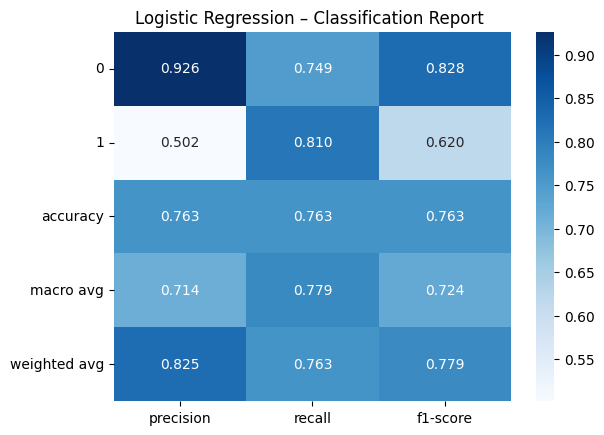

In [450]:
sns.heatmap(new[['precision', 'recall', 'f1-score']],annot=True, fmt=".3f", cmap="Blues")
plt.title("Logistic Regression – Classification Report ")
plt.show()


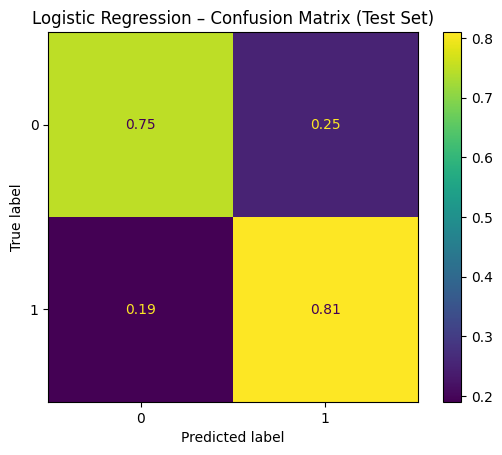

In [451]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.title("Logistic Regression – Confusion Matrix (Test Set)")
plt.show()

### 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report. 

In [452]:
random_Forest_model = RandomForestClassifier(n_estimators=200,
    random_state=315,
    n_jobs=-1)

cv = cross_validate(
    random_Forest_model,
    X_res,
    y_res,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'
    }
)



<!-- Using predict_proba() 
                           model.predict_proba(X_test)
       
 outcome :                          [
 [0.85, 0.15],
 [0.30, 0.70],
 [0.10, 0.90],
 [0.80, 0.20],
 [0.55, 0.45]

Each row means : 
[P(class 0), P(class 1)]

So for row 2:
70% chance employee will leave
30% chance employee will stay

Why predict_proba matters for ROC / AUC
ROC curve needs probabilities, not hard labels

ROC answers:
“How well can the model rank positives above negatives at ALL thresholds?”

To do that, sklearn uses:
model.predict_proba(X)[:, 1]  # probability of class 1

That’s why:
ROC/AUC works
Even if you never call predict_proba() yourself
cross_validate(..., scoring='roc_auc') internally calls predict_proba() (or decision_function).


-- !>


In [453]:
# training the model
random_Forest_model.fit(X_res,y_res)

y_p = random_Forest_model.predict(X_test_concat)

report_2 = classification_report(y_test,y_p ,output_dict=True)
# print(report)

new_2 = pd.DataFrame(report_2).T
new_2

,precision,recall,f1-score,support
0,0.993455,0.996063,0.994758,2286.000
1,0.987288,0.978992,0.983122,714.000
accuracy,0.992000,0.992000,0.992000,0.992
macro avg,0.990372,0.987527,0.988940,3000.000
weighted avg,0.991988,0.992000,0.991988,3000.000


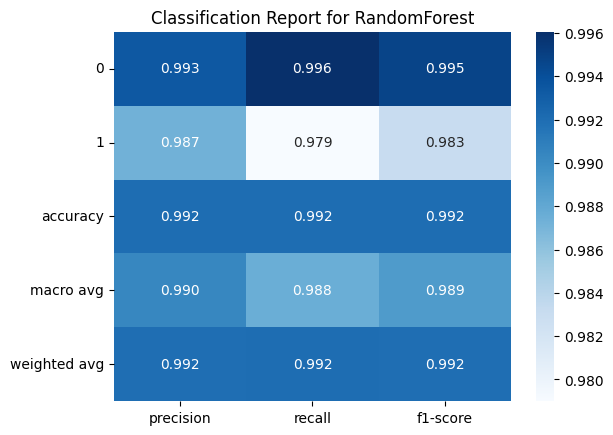

In [454]:
sns.heatmap(new_2[['precision', 'recall','f1-score']],annot=True, fmt=".3f", cmap="Blues" )
plt.title("Classification Report for RandomForest")
plt.show()

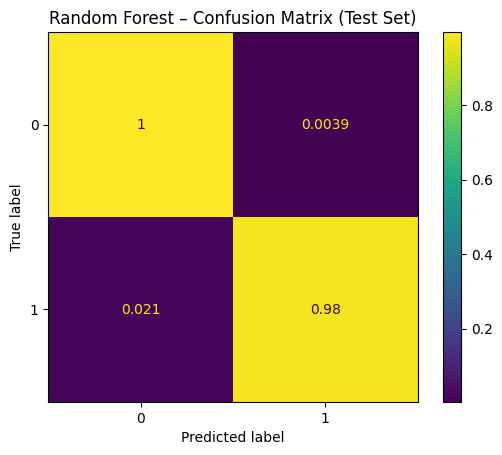

In [455]:
ConfusionMatrixDisplay.from_predictions(y_test, y_p, normalize='true')
plt.title("Random Forest – Confusion Matrix (Test Set)")
plt.show()


### 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report. 

In [456]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=315)

cv_2 = cross_validate(
     clf ,
     X_res,
     y_res,
     cv=5,
     scoring={
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'
    }
    
)

In [457]:
clf.fit(X_res, y_res)

y_3 = clf.predict(X_test_concat)

score_2 = classification_report(y_test,y_3 ,output_dict=True)
# print(report)

new_3 = pd.DataFrame(score_2).T
new_3

,precision,recall,f1-score,support
0,0.980366,0.982940,0.981651,2286.000
1,0.944915,0.936975,0.940928,714.000
accuracy,0.972000,0.972000,0.972000,0.972
macro avg,0.962641,0.959957,0.961290,3000.000
weighted avg,0.971929,0.972000,0.971959,3000.000


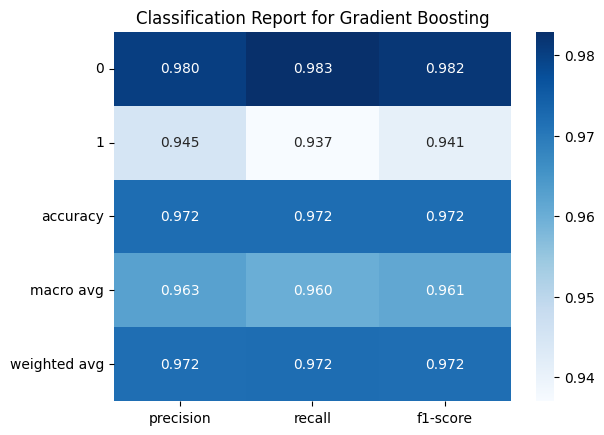

In [458]:
sns.heatmap(new_3[['precision','recall','f1-score']],annot=True, fmt=".3f", cmap="Blues" )
plt.title("Classification Report for Gradient Boosting")
plt.show()


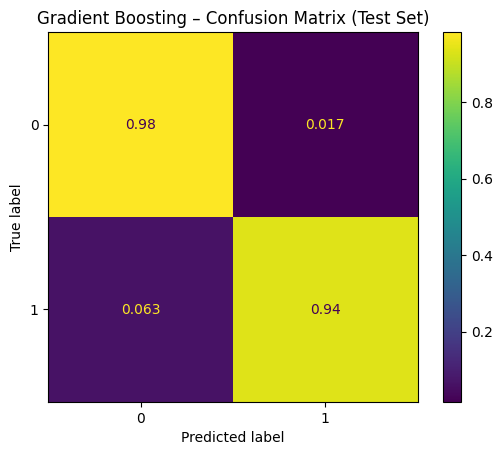

In [472]:
ConfusionMatrixDisplay.from_predictions(y_test, y_3 , normalize='true')
plt.title("Gradient Boosting – Confusion Matrix (Test Set)")
plt.show()

# 6-Identify the best model and justify the evaluation metrics used. 

### 6.1 Find the ROC/AUC for each model and plot the ROC curve. 

Text(0.5, 1.0, 'Logistic Regression  ROC curve (AUC = 0.8261)')

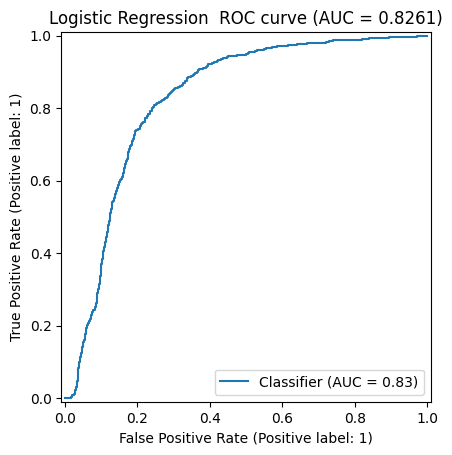

In [459]:
# LogisticRegression 

# probabilities
y_prob_logistic = logistic_model.predict_proba(X_test_concat)[:, 1] #  this takes the predicted probabilities for the positive class (class = 1)


auc_lr = roc_auc_score(y_test, y_prob_logistic )

# Plot ROC curve 
display = RocCurveDisplay.from_predictions(y_test, y_prob_logistic)
display.ax_.set_title(f'Logistic Regression  ROC curve (AUC = {auc_lr:.4f})')



Text(0.5, 1.0, 'RandomForest Classifier  ROC curve (AUC = 0.9960)')

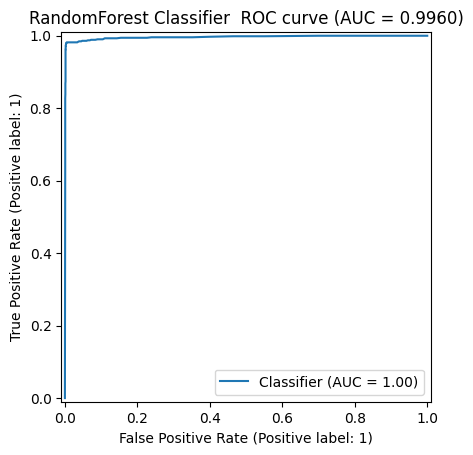

In [470]:
 # RandomForestClassifier roc/curve

# probabilities
y_prob_random = random_Forest_model.predict_proba(X_test_concat)[:, 1]

# roc_acu_score
roc = roc_auc_score(y_test,y_prob_random )

# display the curve

display = RocCurveDisplay.from_predictions(y_test, y_prob_random )
display.ax_.set_title(f'RandomForest Classifier  ROC curve (AUC = {roc:.4f})')


[0.00211818 0.95645731 0.05165711 ... 0.02299498 0.00224675 0.96077537]


Text(0.5, 1.0, 'Gradient Boosting Classifier   ROC curve (AUC = 0.9886)')

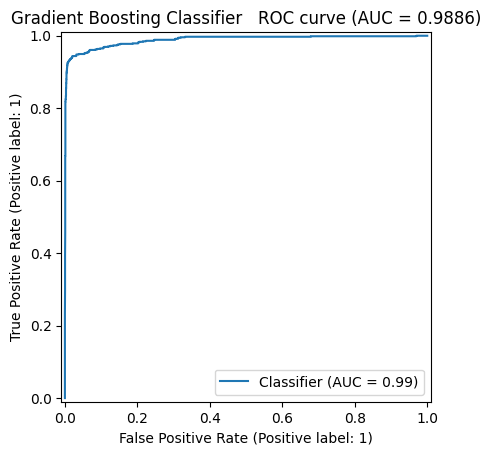

In [469]:
#  GradientBoostingClassifier 


# probabilities
y_prob_clf= clf.predict_proba(X_test_concat)[:, 1]
print(y_prob_clf)
# roc_acu

roc_ac = roc_auc_score(y_test, y_prob_clf)

# displaying the curve

display = RocCurveDisplay.from_predictions(y_test, y_prob_clf)
display.ax_.set_title(f'Gradient Boosting Classifier   ROC curve (AUC = {roc_ac :.4f})')

### 6.2 Find the confusion matrix for each of the models. 

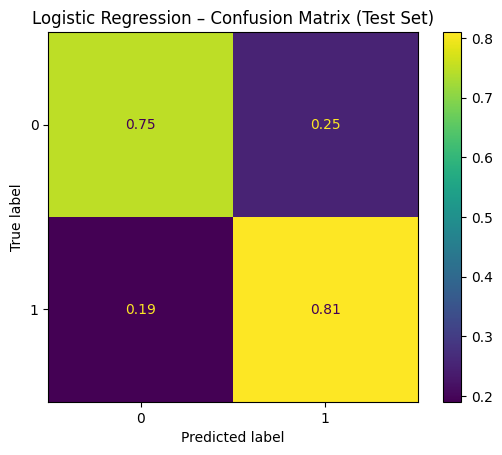

In [462]:
# Logistic regression confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.title("Logistic Regression – Confusion Matrix (Test Set)")
plt.show()

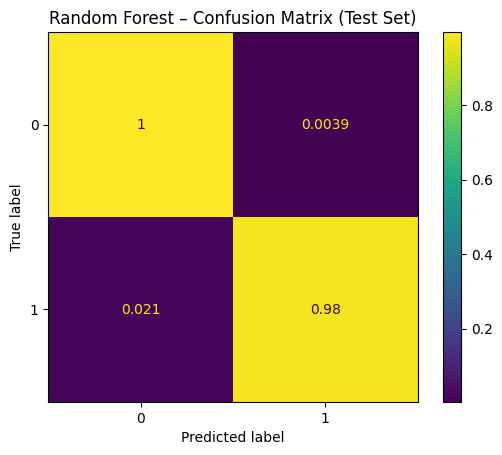

In [468]:
# random forest confsing matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_p, normalize='true')
plt.title("Random Forest – Confusion Matrix (Test Set)")
plt.show()

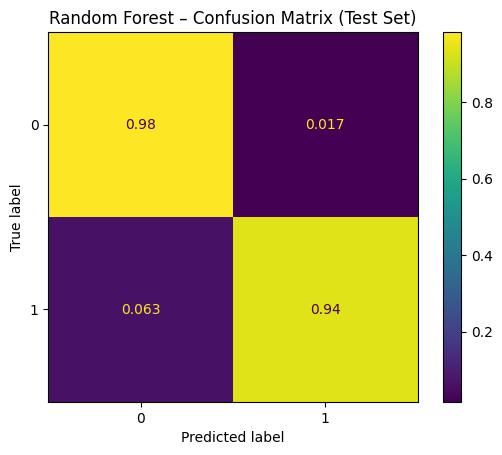

In [464]:
# GradientBoostingClassifier confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_3 , normalize='true')
plt.title("Random Forest – Confusion Matrix (Test Set)")
plt.show()

### 6.3 Explain which metric needs to be used from the confusion matrix: Recall or Precision? 


In [465]:
# it should be used "recall" beacuse I normilzed the confusion matrix so i only can see "recall"

In [466]:
# First: how to read this confusion matrix

# Axes:
# Y-axis (True label) → actual outcome
# X-axis (Predicted label) → model prediction

# Classes:
# 0 = stayed
# 1 = left (this is your positive class)
# Because it’s normalized, each row sums to 1.

# The matrix (re-written clearly)
# | True \ Pred    | 0        | 1        |
# | -------------- | -------- | -------- |
# | **0 (stayed)** | **0.99** | 0.0079   |
# | **1 (left)**   | 0.022    | **0.98** |

# A confusion matrix can be:
# Not normalized (raw counts)
# Normalized by true labels → shows recall
# Normalized by predicted labels → shows precision


## 7- Suggest various retention strategies for targeted employees. 

### 7.1 Using the best model, predict the probability of employee turnover in the test data. 

In [ ]:
# the best model is base on outcomes as below is "RandomForest"

                        #   Logistic        RandomForest      Gradient 

# recall            -->    0.81(class 1)   0.97(class 1)     0.93 (class 1)

# confusing matrix  -->    0.81(class 1)    0.98(class 1 TP).  0.94(Class 1)

# roc-auc metric    -->      0.82            0.99               0.98

In [473]:
# Fit the best model on balanced training data
best_model = random_Forest_model
best_model.fit(X_res, y_res)

# Predict probability of turnover (class = 1)
turnover_prob = best_model.predict_proba(X_test_concat)[:, 1]
turnover_prob

array([0.   , 0.48 , 0.045, ..., 0.025, 0.025, 0.995], shape=(3000,))

## 7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone. 

Safe Zone (Green) (Score < 20%) 

Low-Risk Zone (Yellow) (20% < Score < 60%) 

Medium-Risk Zone (Orange) (60% < Score < 90%) 

High-Risk Zone (Red) (Score > 90%)

In [474]:
results = X_test.copy()
results['turnover_probability'] = turnover_prob

results

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,turnover_probability
10627,0.98,0.77,3,191,2,0,0,sales,medium,0.000
2703,0.76,0.93,3,271,5,0,0,hr,low,0.480
6059,0.70,0.93,3,185,4,0,0,accounting,medium,0.045
3258,0.48,0.61,3,223,3,1,0,support,medium,0.005
4565,0.57,0.90,3,144,2,0,0,IT,medium,0.025
...,...,...,...,...,...,...,...,...,...,...
4961,0.84,0.96,3,161,2,1,0,sales,low,0.000
4557,0.52,0.77,3,142,2,0,1,support,low,0.065
6610,0.86,0.99,3,254,2,0,0,support,medium,0.025
10327,0.64,0.43,5,269,3,0,0,sales,medium,0.025


In [477]:
def risk_zone(p):
    if p < 0.20:
        return 'Safe Zone (Green)'
    elif 0.20 <= p < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif 0.60 <= p < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

results['risk_zone'] = results['turnover_probability'].apply(risk_zone)


results[['turnover_probability', 'risk_zone']].head(10)

,turnover_probability,risk_zone
10627,0.000,Safe Zone (Green)
2703,0.480,Low-Risk Zone (Yellow)
6059,0.045,Safe Zone (Green)
3258,0.005,Safe Zone (Green)
4565,0.025,Safe Zone (Green)
4991,0.010,Safe Zone (Green)
13976,0.010,Safe Zone (Green)
9427,0.005,Safe Zone (Green)
7173,0.000,Safe Zone (Green)
13412,0.000,Safe Zone (Green)


In [ ]:
# apply() does (plain English)

# apply() takes each value in a column, one by one, and passes it to a function.
# The function returns a result.
# apply() collects those results into a new column.